# Wstęp

In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

'''
%matplotlib inline  - pozwala na rysowanie wykresów w notatniku
'''

'\n%matplotlib inline  - pozwala na rysowanie wykresów w notatniku\n'

In [27]:
bar = pd.read_csv('http://piotrdomagala.pl/data/weather_barcelona.csv', index_col='Date')
rom = pd.read_csv('http://piotrdomagala.pl/data/weather_rome.csv', index_col='Date')
ams = pd.read_csv('http://piotrdomagala.pl/data/weather_amsterdam.csv', index_col='Date')

In [28]:
temp_max = pd.DataFrame(index=bar.index)
temp_max['Barcelona'] = bar['TempMax']
temp_max['Rome'] = rom['TempMax']
temp_max['Amsterdam'] = ams['TempMax']

In [29]:
temp_max.head()

,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8


In [30]:
def GradeDay(row):
    if(row['TempMax'] >= row['AvgTempMax']):
        return 'PLUS'
    else:
        return 'MINUS'

In [31]:
rom['GradeDay'] = rom.apply(GradeDay, axis=1)
bar['GradeDay'] = bar.apply(GradeDay, axis=1)
ams['GradeDay'] = ams.apply(GradeDay, axis=1)

In [32]:
rom.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,14,8,0,12,4,PLUS
2018-01-02,13,7,0,12,4,PLUS
2018-01-03,14,1,0,12,4,PLUS
2018-01-04,16,6,0,12,4,PLUS
2018-01-05,17,7,0,12,3,PLUS


In [33]:
rom['GradeDay'].value_counts()

PLUS 70
MINUS 20
Name: GradeDay, dtype: int64

In [34]:
cities3 = pd.DataFrame(index=['MINUS','PLUS'])
cities3['Barcelona'] = bar['GradeDay'].value_counts()
cities3['Rome'] = rom['GradeDay'].value_counts()
cities3['Amsterdam'] = ams['GradeDay'].value_counts()

cities3

,Barcelona,Rome,Amsterdam
MINUS,26,20,22
PLUS,64,70,68


<Axes: ylabel='Barcelona'>

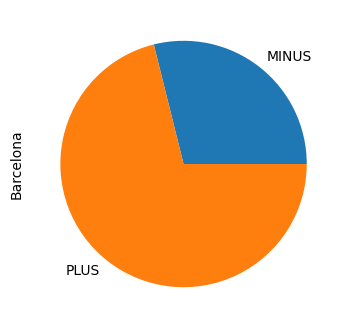

In [35]:
cities3['Barcelona'].plot(kind='pie', figsize=(4,4))

array([%lt;Axes: ylabel='Barcelona'%gt;, %lt;Axes: ylabel='Rome'%gt;,
 %lt;Axes: ylabel='Amsterdam'%gt;], dtype=object)

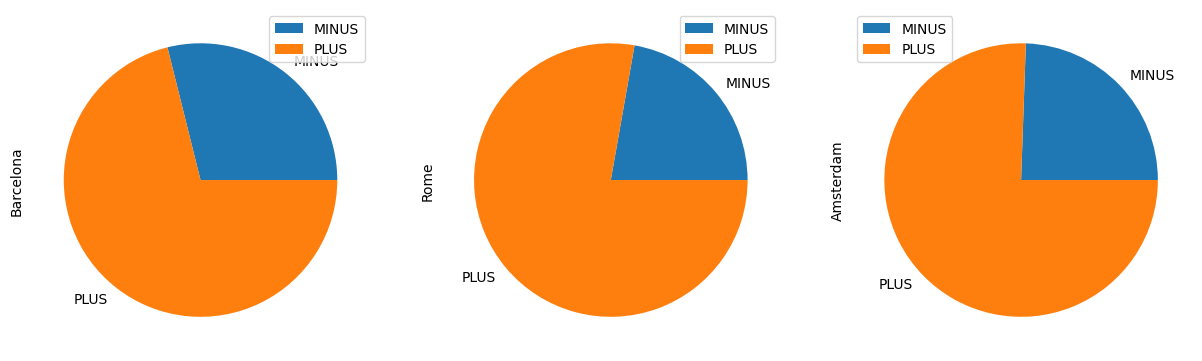

In [36]:
cities3.plot(kind='pie', subplots=True, figsize=(15,5))

array([%lt;Axes: ylabel='Barcelona'%gt;, %lt;Axes: ylabel='Rome'%gt;,
 %lt;Axes: ylabel='Amsterdam'%gt;], dtype=object)

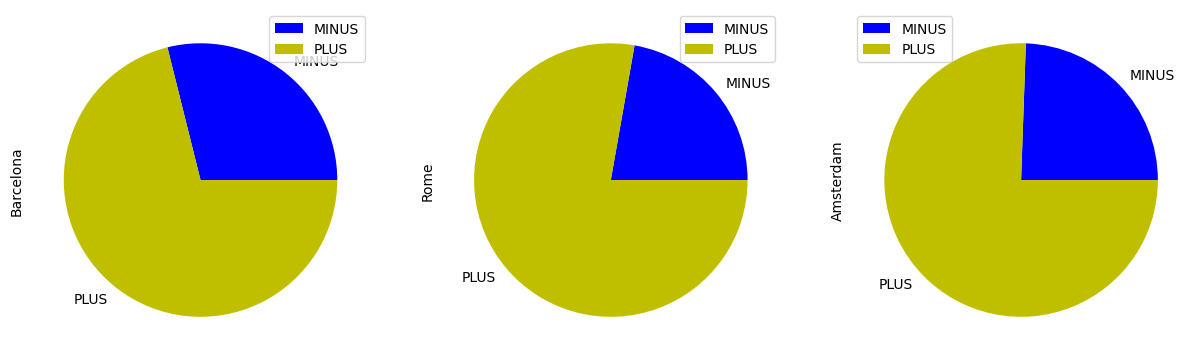

In [37]:
cities3.plot(kind='pie', subplots=True, figsize=(15,5), colors=['b','y'])

array([%lt;Axes: ylabel='Barcelona'%gt;, %lt;Axes: ylabel='Rome'%gt;,
 %lt;Axes: ylabel='Amsterdam'%gt;], dtype=object)

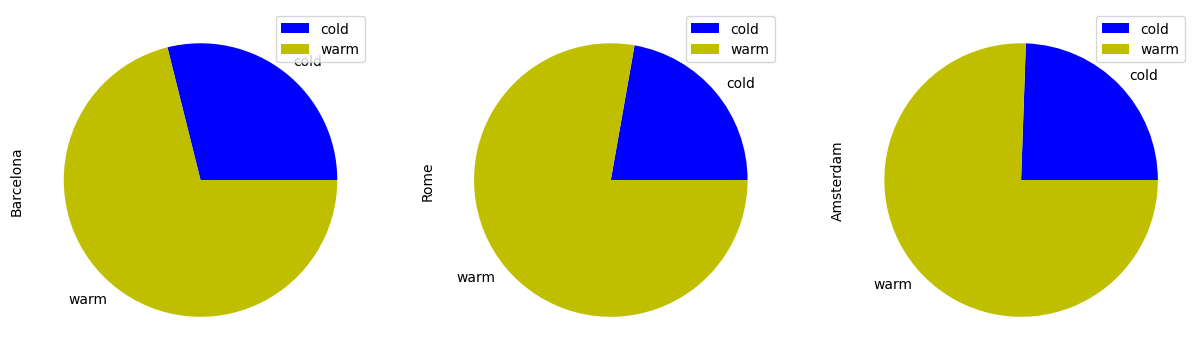

In [38]:
cities3.plot(kind='pie', 
             subplots=True, 
             figsize=(15,5), 
             colors=['b','y'],
             labels=['cold','warm']
             )

array([%lt;Axes: ylabel='Barcelona'%gt;, %lt;Axes: ylabel='Rome'%gt;,
 %lt;Axes: ylabel='Amsterdam'%gt;], dtype=object)

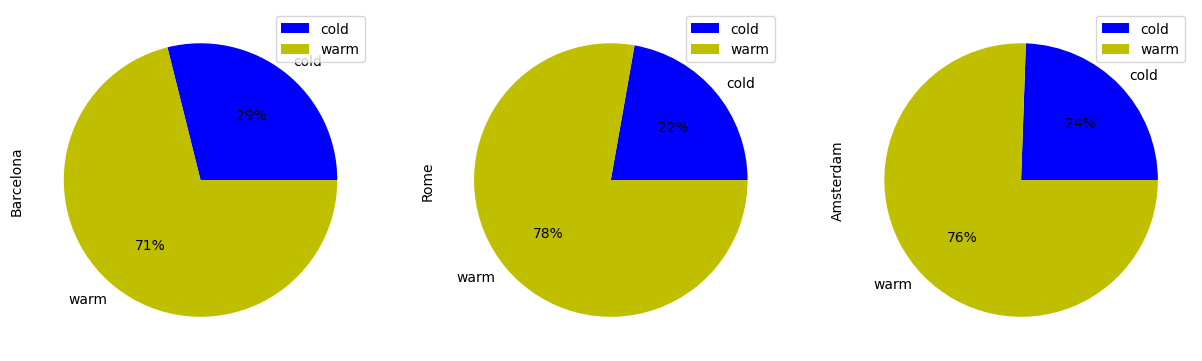

In [39]:
cities3.plot(kind='pie', 
             subplots=True, 
             figsize=(15,5), 
             colors=['b','y'],
             labels=['cold','warm'], 
             autopct='%.0f%%' # ustawiamy wartości na %
             )

array([%lt;Axes: ylabel='Barcelona'%gt;, %lt;Axes: ylabel='Rome'%gt;,
 %lt;Axes: ylabel='Amsterdam'%gt;], dtype=object)

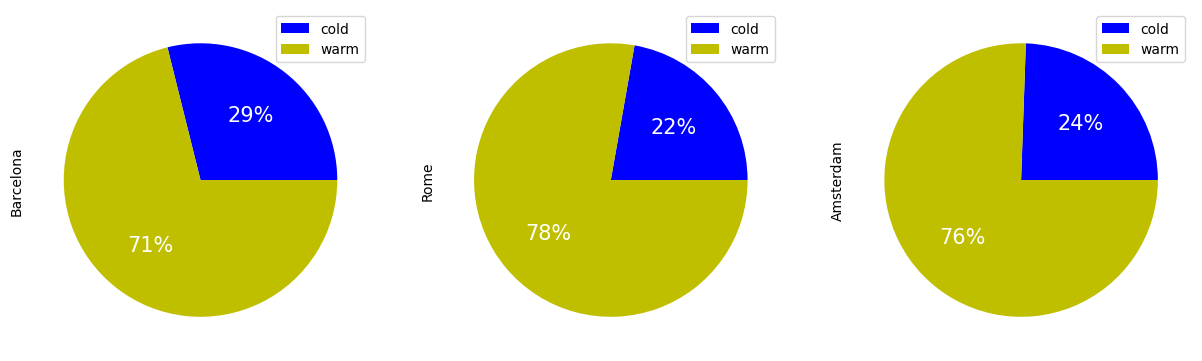

In [40]:
cities3.plot(kind='pie', 
             subplots=True, 
             figsize=(15,5), 
             colors=['b','y'],
             labels=['cold','warm'], 
             autopct='%.0f%%', 
             fontsize=15, 
             textprops=dict(color='w') # zmieniamy kolor czcionki
             )

array([[%lt;Axes: ylabel='Barcelona'%gt;, %lt;Axes: ylabel='Rome'%gt;],
 [%lt;Axes: ylabel='Amsterdam'%gt;, %lt;Axes: %gt;]], dtype=object)

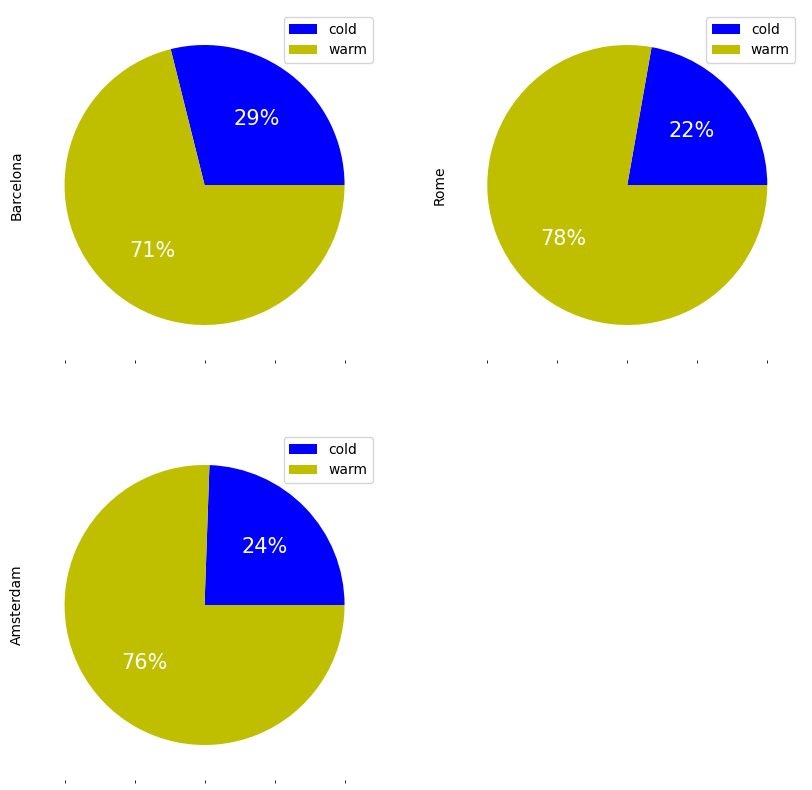

In [41]:
cities3.plot(kind='pie', 
             subplots=True, 
             figsize=(10,10), 
             colors=['b','y'],
             labels=['cold','warm'], 
             autopct='%.0f%%', 
             fontsize=15, 
             textprops=dict(color='w'),
             layout=(2,2) # wyświetlamy po 2 wykresy w 2 wierszach
             )

array([[%lt;Axes: ylabel='Barcelona'%gt;, %lt;Axes: ylabel='Rome'%gt;],
 [%lt;Axes: ylabel='Amsterdam'%gt;, %lt;Axes: %gt;]], dtype=object)

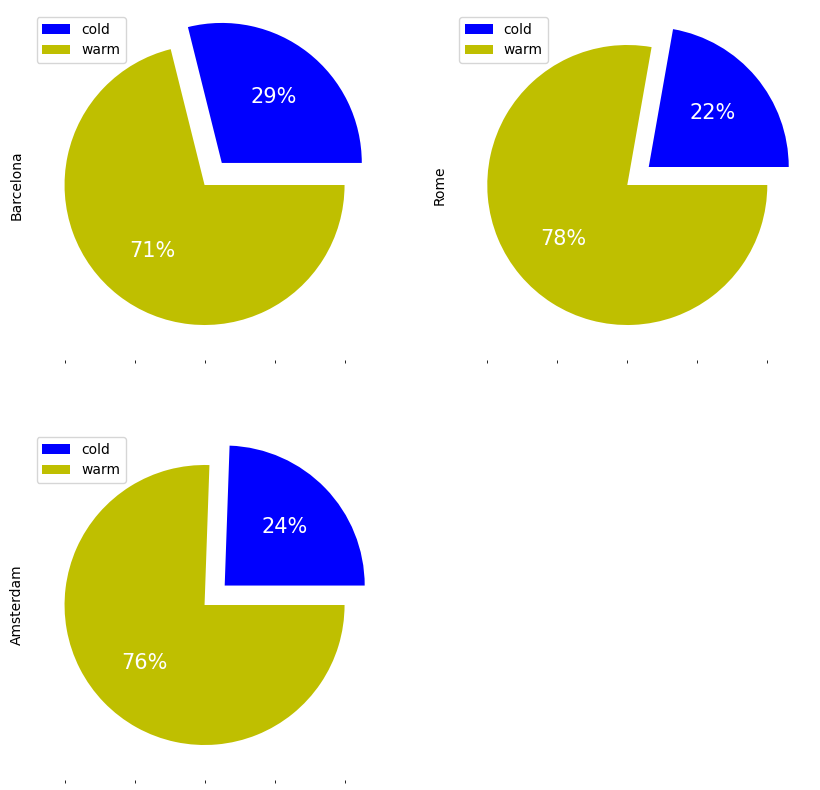

In [42]:
cities3.plot(kind='pie', 
             subplots=True, 
             figsize=(10,10), 
             colors=['b','y'],
             labels=['cold','warm'], 
             autopct='%.0f%%', 
             fontsize=15, 
             textprops=dict(color='w'),
             layout=(2,2), 
             explode=(0.2,0)  #wysuwamy fragment wykresu
             )

# Zadanie

In [49]:
import datetime
#Import data
nasa = pd.read_csv("/data/workspace_files/nasa_facebook_statuses.csv", 
usecols=["status_published","num_reactions",
"num_comments","num_shares","num_likes"])
#Convert column type to date time
nasa["status_published"] = pd.to_datetime(nasa["status_published"])
#Select observations between two datetimes - May 2015
filter =(nasa['status_published'] >= '2016-3-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]
#Add column with day only
nasa['month'] = nasa.apply(lambda row: row["status_published"].month,axis=1)
#Group all columns by sum
nasa_by_month = nasa.groupby(by='month').sum()
nasa_by_month.head()

<ipython-input-49-b01a1ef3630b>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nasa_by_month = nasa.groupby(by='month').sum()


,num_reactions,num_comments,num_shares,num_likes
month,,,,
3,3003815,49108,392585,2846361
4,2927616,120118,370803,2760385
5,2708977,46122,393576,2548960


<Axes: title={'center': 'NASA Facebook Activity'}, ylabel='num_likes'>

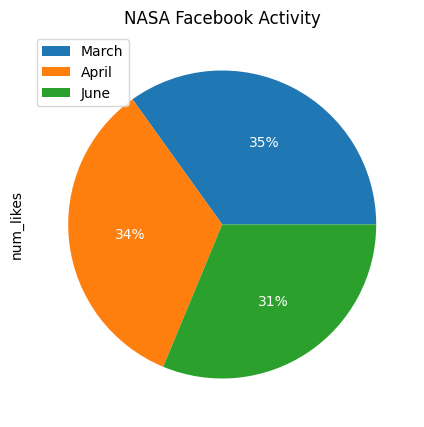

In [56]:
nasa_by_month['num_likes'].plot(kind='pie', 
                              figsize=(5,5),
                              title='NASA Facebook Activity', 
                                labels=("March","April","June"),
                                legend=True,
                                autopct="%.0f%%", textprops=dict(color='white'))